    #Bike sharing dataset case study

This report analyses the dataset containing the hourly and daily count of rental bikes between 2011 and
2012, together with the corresponding weather and seasonal information.
It aims to highlight some of the key findings that have the potential to benefit the company and eventually drive more revenue, using the method of exploratory data analysis.
The report will aim to answer the following questions:
How does seasonality and weather affect the demand for shared bikes? Can it be used as a predictor of demand?
How does the demand fluctuate during the day, week and year and what are the trends?
Are the main trends different for casual and registered users?


## Importing the relevant libraries

In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from plotnine import ggplot, aes, geom_line,geom_point,geom_smooth
from plotnine.data import *

## Load the data

In [286]:
data = pd.read_csv('wunderflats1.csv', sep = ";")

In [42]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,0,6,0,1,"0,24","0,2879","0,81",0,3,13,16
1,2,01/01/2011,1,0,1,1,0,6,0,1,"0,22","0,2727","0,8",0,8,32,40
2,3,01/01/2011,1,0,1,2,0,6,0,1,"0,22","0,2727","0,8",0,5,27,32
3,4,01/01/2011,1,0,1,3,0,6,0,1,"0,24","0,2879","0,75",0,3,10,13
4,5,01/01/2011,1,0,1,4,0,6,0,1,"0,24","0,2879","0,75",0,0,1,1


In [ ]:
data['temp'] = data['temp'].str.replace(',', '').astype(float)
data['atemp'] = data['atemp'].str.replace(',', '').astype(float)
data['hum'] = data['hum'].str.replace(',', '').astype(float)
data['windspeed'] = data['windspeed'].str.replace(',', '').astype(float)

In [288]:
data['atemp'] = data['atemp'].div(100).round(2)

In [311]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,39.292710,42.883631,56.974049,1733.668968,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,25.147934,21.184215,24.970017,1319.915133,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,16.000000,27.270000,42.000000,896.000000,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,38.000000,45.450000,59.000000,1642.000000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,62.000000,60.610000,77.000000,2537.000000,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,98.000000,98.480000,97.000000,8507.000000,367.000000,886.000000,977.000000


In [45]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<AxesSubplot:>

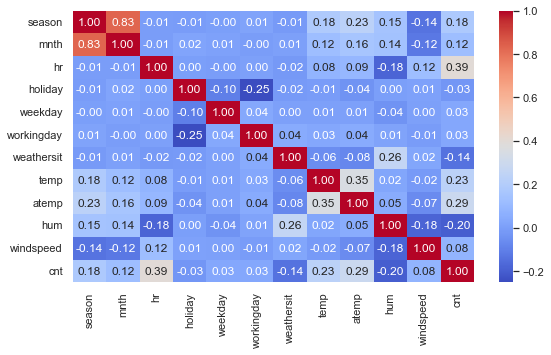

In [319]:
corr_test = data.drop(columns = ['casual','registered','instant','yr'])
correlation = corr_test.corr()
plt.figure(figsize = (9,5))
sns.heatmap(correlation, cmap = 'coolwarm' , annot=True , fmt = '.2f')

Text(0.5, 1.0, 'Casual vs Registred Users Hourly Distribution')

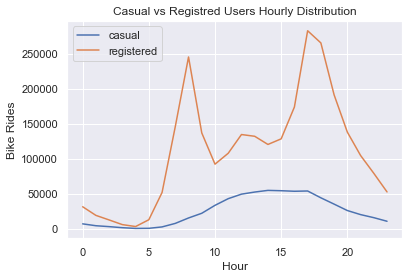

In [325]:
casual_by_hour = data.groupby(['hr'])['casual'].sum()
registered_by_hour = data.groupby('hr')['registered'].sum()
ax = casual_by_hour.plot(legend = True)
registered_by_hour.plot(ax=ax,legend = True)
plt.xlabel('Hour')
plt.ylabel('Bike Rides')
plt.title('Casual vs Registred Users Hourly Distribution')


Text(0.5, 1.0, 'Casual vs Registred Users Weekly Distribution')

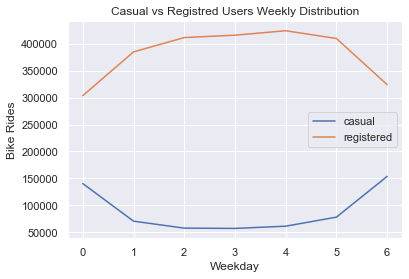

In [337]:
casual_by_wd = data.groupby(['weekday'])['casual'].sum()
registered_by_wd = data.groupby('weekday')['registered'].sum()
mx = casual_by_wd.plot(legend = True)
registered_by_wd.plot(ax=mx,legend = True)
plt.xlabel('Weekday')
plt.ylabel('Bike Rides')
plt.title('Casual vs Registred Users Weekly Distribution')


/Users/katebaranova/.pyenv/versions/3.7.6/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.


array([<AxesSubplot:title={'center':'casual'}, xlabel='yr'>,
       <AxesSubplot:title={'center':'registered'}, xlabel='yr'>],
      dtype=object)

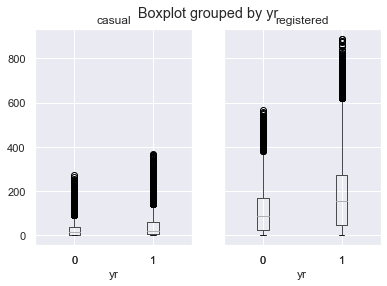

In [336]:

data.boxplot(column=['casual','registered'],by = "yr")

Text(0.5, 1.0, 'Count of Bikes rented based on weather situation')

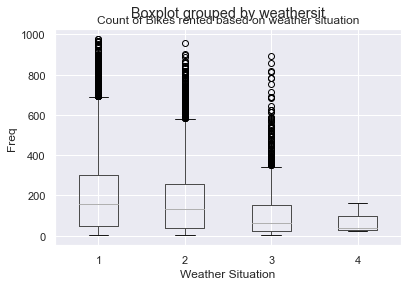

In [338]:
#The histogram allows as to see that weather situation drastically affects how much the service is used.
#Clear skies with no rain or mist is the most favorable by far
#Heavy rain or storms as a type 4 situation render the service almost unusable, which shows clear dependancy
data.boxplot(column=['cnt'],by = "weathersit")
plt.xlabel('Weather Situation')
plt.ylabel('Freq')
plt.title('Count of Bikes rented based on weather situation')


<AxesSubplot:xlabel='hr', ylabel='casual'>

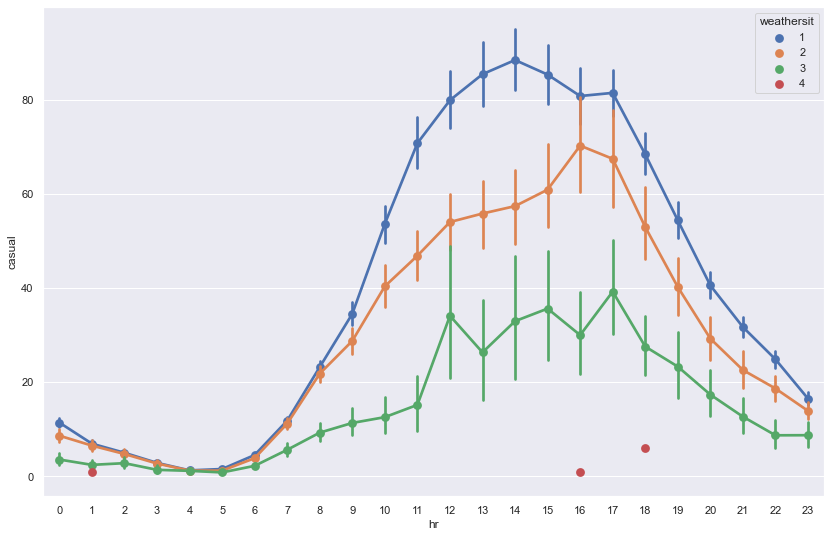

In [389]:
#weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
#          2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
#          3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
#          4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
fig,ax = plt.subplots(figsize=(14,9))

sns.pointplot(data=data[['hr',
                           'casual',
                           'weathersit']],
              x='hr',
              y='casual',
              hue='weathersit',
              ax=ax)

<AxesSubplot:xlabel='hr', ylabel='registered'>

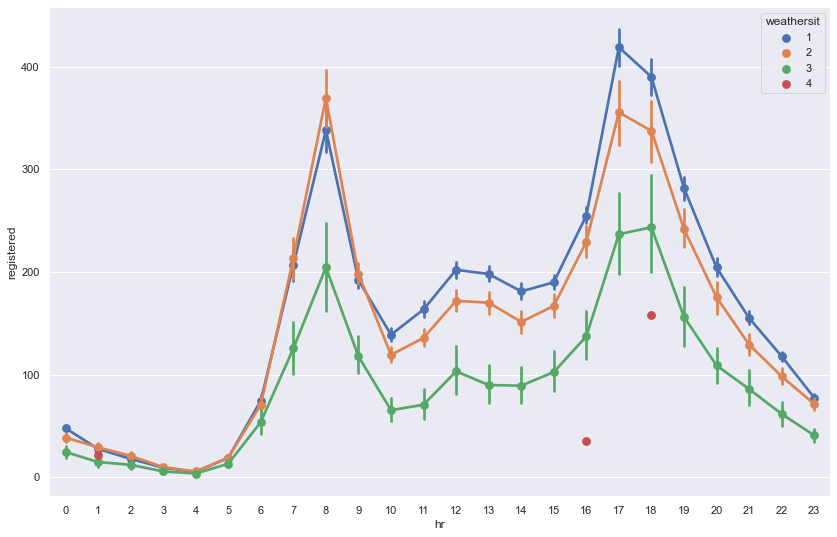

In [391]:
fig,ax = plt.subplots(figsize=(14,9))
sns.pointplot(data=data[['hr',
                           'registered',
                           'weathersit']],
              x='hr',
              y='registered',
              hue='weathersit',
              ax=ax)

<AxesSubplot:xlabel='hr', ylabel='cnt'>

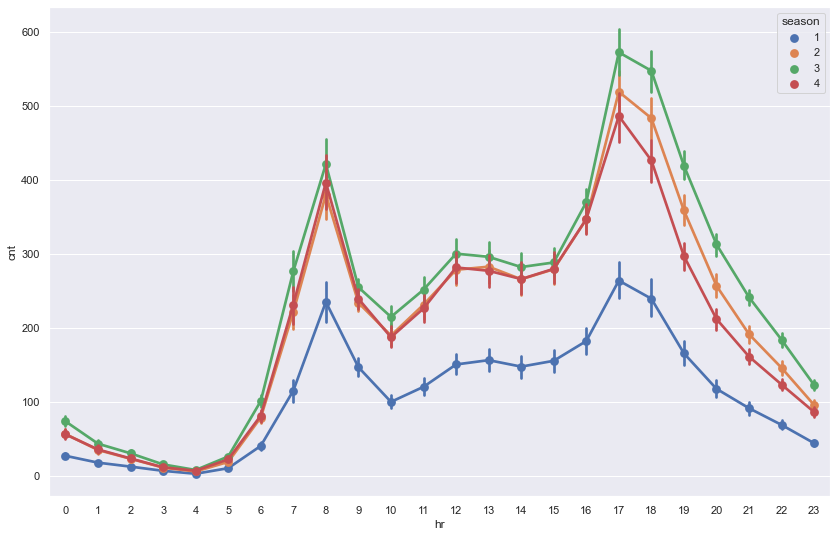

In [390]:
fig,ax = plt.subplots(figsize=(14,9))
sns.pointplot(data=data[['hr',
                           'cnt',
                           'season']],
              x='hr',
              y='cnt',
              hue='season',
              ax=ax)


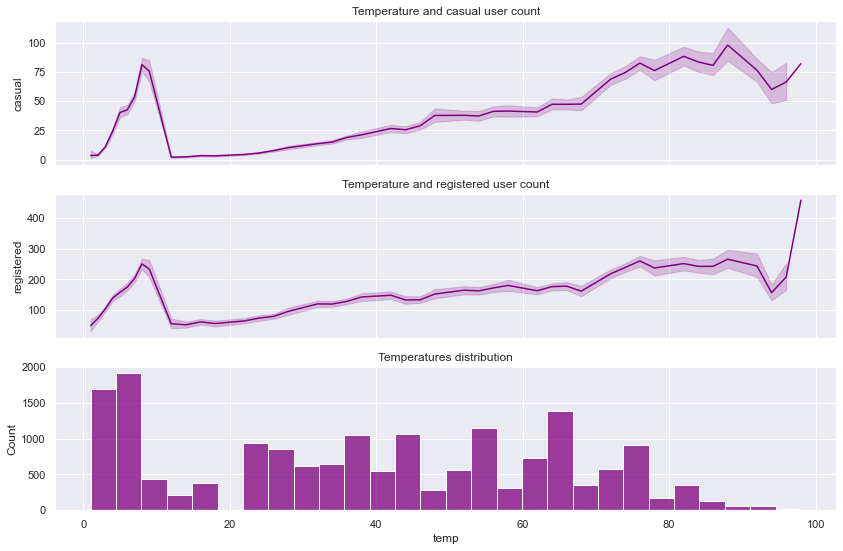

In [382]:
fig, (ax,ax3,ax2) = plt.subplots(3,1,sharex=True,figsize=(14,9))
sns.lineplot(data=data, x='temp', y='casual',ax=ax,color='purple')
sns.lineplot(data=data, x='temp', y='registered',ax=ax3,color='purple')
sns.histplot(data['temp'],ax=ax2,color='purple')
ax.set_title('Temperature and casual user count')
ax2.set_title('Temperatures distribution')
ax3.set_title('Temperature and registered user count')
plt.show()

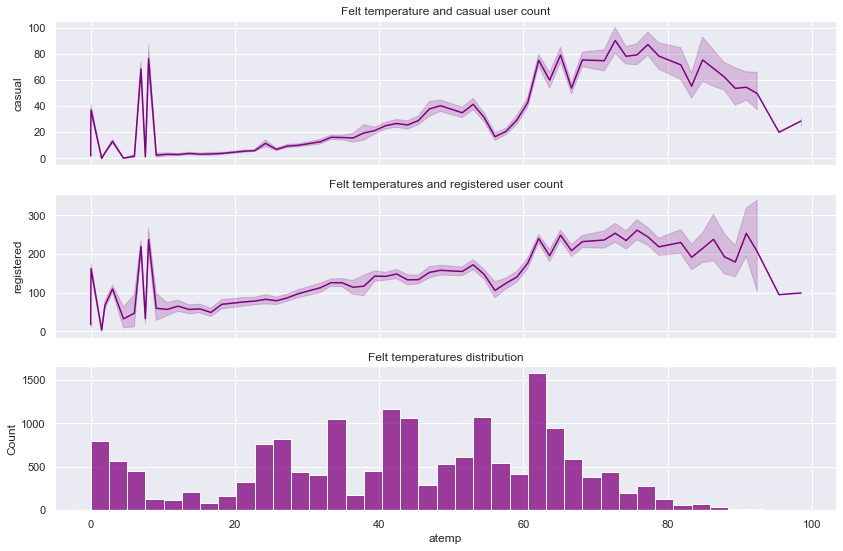

In [386]:
fig, (ax,ax3,ax2) = plt.subplots(3,1,sharex=True,figsize=(14,9))
sns.lineplot(data=data, x='atemp', y='casual',ax=ax,color='purple')
sns.lineplot(data=data, x='atemp', y='registered',ax=ax3,color='purple')
sns.histplot(data['atemp'],ax=ax2,color='purple')
ax.set_title('Felt temperature and casual user count')
ax2.set_title('Felt temperatures distribution')
ax3.set_title('Felt temperatures and registered user count')
plt.show()

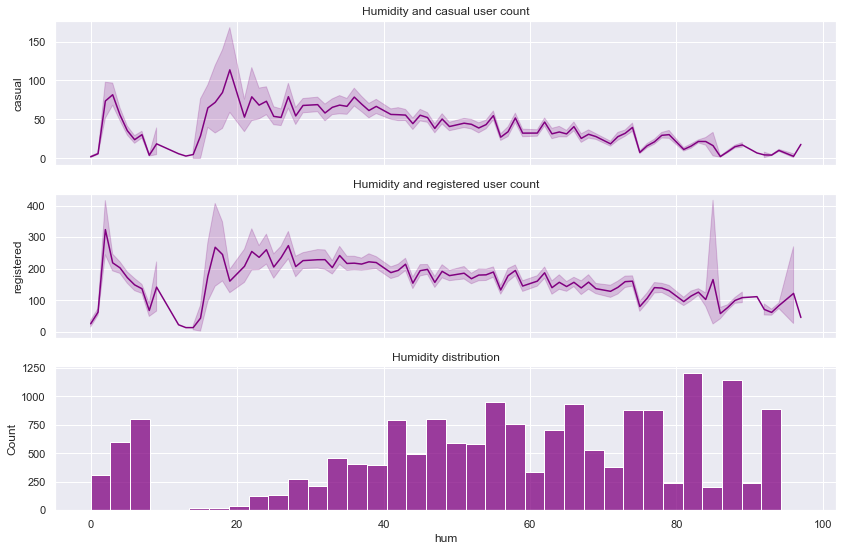

In [387]:
fig, (ax,ax3,ax2) = plt.subplots(3,1,sharex=True,figsize=(14,9))
sns.lineplot(data=data, x='hum', y='casual',ax=ax,color='purple')
sns.lineplot(data=data, x='hum', y='registered',ax=ax3,color='purple')
sns.histplot(data['hum'],ax=ax2,color='purple')
ax.set_title('Humidity and casual user count')
ax2.set_title('Humidity distribution')
ax3.set_title('Humidity and registered user count')
plt.show()

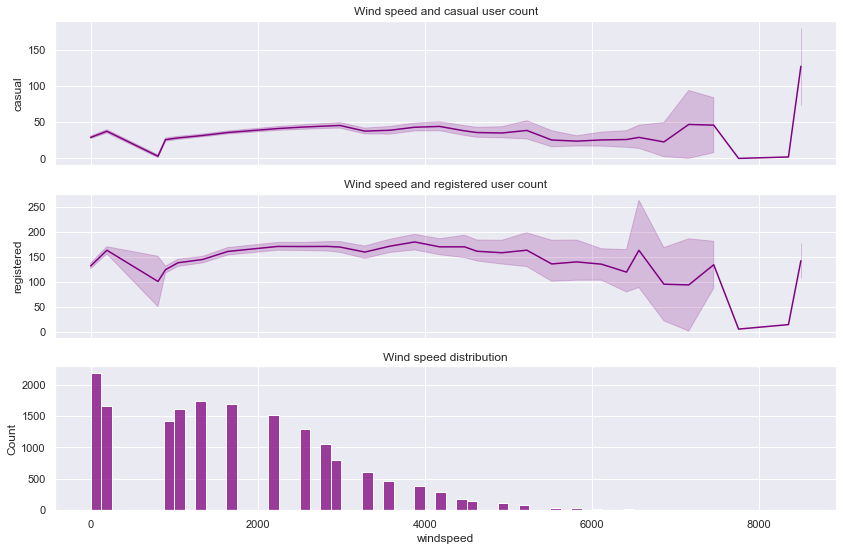

In [385]:
fig, (ax,ax3,ax2) = plt.subplots(3,1,sharex=True,figsize=(14,9))
sns.lineplot(data=data, x='windspeed', y='casual',ax=ax,color='purple')
sns.lineplot(data=data, x='windspeed', y='registered',ax=ax3,color='purple')
sns.histplot(data['windspeed'],ax=ax2,color='purple')
ax.set_title('Wind speed and casual user count')
ax2.set_title('Wind speed distribution')
ax3.set_title('Wind speed and registered user count')
plt.show()

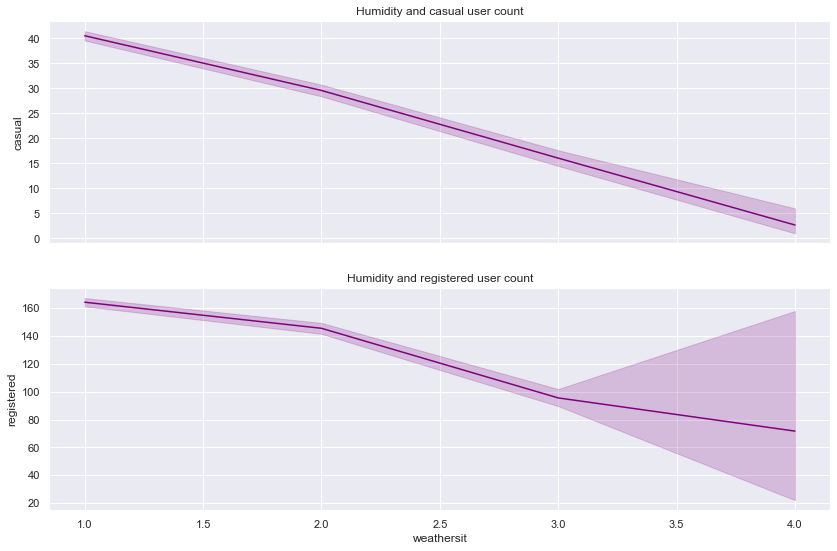

In [393]:
fig, (ax,ax2) = plt.subplots(2,1,sharex=True,figsize=(14,9))
sns.lineplot(data=data, x='weathersit', y='casual',ax=ax,color='purple')
sns.lineplot(data=data, x='weathersit', y='registered',ax=ax2,color='purple')
ax.set_title('Humidity and casual user count')
ax2.set_title('Humidity and registered user count')
plt.show()